In [1]:
# Import library
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

from preprocessing import LSTMPreprocess

In [2]:
# Load Dataset
train_set = pd.read_csv("data/train.csv")
valid_set = pd.read_csv("data/valid.csv")
test_set = pd.read_csv("data/test.csv")

In [3]:
# Preprocess dataset (SPLIT)
label_map = {"positive": 0, "neutral": 1, "negative": 2}
num_classes = len(label_map)

print("Memproses dataset...")
train_texts = train_set["text"]
train_labels = np.array(train_set["label"].map(lambda x: label_map[x]))

test_texts = test_set["text"]
test_labels = np.array(test_set["label"].map(lambda x: label_map[x]))

valid_texts = valid_set["text"]
valid_labels = np.array(valid_set["label"].map(lambda x: label_map[x]))


Memproses dataset...


In [4]:
# Preprocess dataset (Tokenization)
preprocess_cls = LSTMPreprocess()

train_token = preprocess_cls.tokenization(train_texts)
test_token = preprocess_cls.tokenization(test_texts)
valid_token = preprocess_cls.tokenization(valid_texts)

In [5]:
# Model

embedding_dim = 128  # Dimensi vektor embedding
lstm_units = 64  # Jumlah unit di layer LSTM
dropout_rate = 0.7  # Rate untuk dropout
vocab_size = 10000  # Vocabulary Size

# Bangun model Sequential Keras
model = keras.Sequential(
    [
        # 1. Embedding Layer
        keras.layers.Embedding(
            input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True
        ),
        
        # 2. Bidirectional LSTM Layer
        keras.layers.Bidirectional(keras.layers.LSTM(lstm_units, kernel_regularizer=keras.regularizers.l2(0.01))),
        
        # 2. Unidirectional LSTM Layer
        # keras.layers.LSTM(lstm_units, kernel_regularizer=keras.regularizers.l2(0.01)),

        # 3. Dropout Layer
        keras.layers.Dropout(dropout_rate),
        # 4. Dense Layer (Hidden)
        keras.layers.Dense(32, activation="relu"),
        keras.layers.Dropout(0.5),
        # 5. Dense Layer (Output)
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.build(input_shape=train_token.shape)

# Summary
model.summary()

# Kompilasi model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (500, 100, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (500, 128)             │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (500, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (500, 32)              │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (500, 32)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (500, 3)               │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,383,043 (5.28 MB)

 Trainable params: 1,383,043 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train
epochs = 100
batch_size = 64

history = model.fit(
    train_token,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(valid_token, valid_labels),
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.3480 - loss: 4.3540 - val_accuracy: 0.4500 - val_loss: 3.8953
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.4558 - loss: 3.7572 - val_accuracy: 0.4700 - val_loss: 3.3669
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.4668 - loss: 3.2407 - val_accuracy: 0.3800 - val_loss: 2.9060
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.4863 - loss: 2.7721 - val_accuracy: 0.4000 - val_loss: 2.5076
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.6019 - loss: 2.3489 - val_accuracy: 0.5300 - val_loss: 2.1863
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.6562 - loss: 1.9200 - val_accuracy: 0.5300 - val_loss: 2.0845
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6763 - loss: 1.5564 - val_accuracy: 0.5200 - val_loss: 2.0448
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.7399 - loss: 1.2619 - val_accuracy: 0.5300 - v

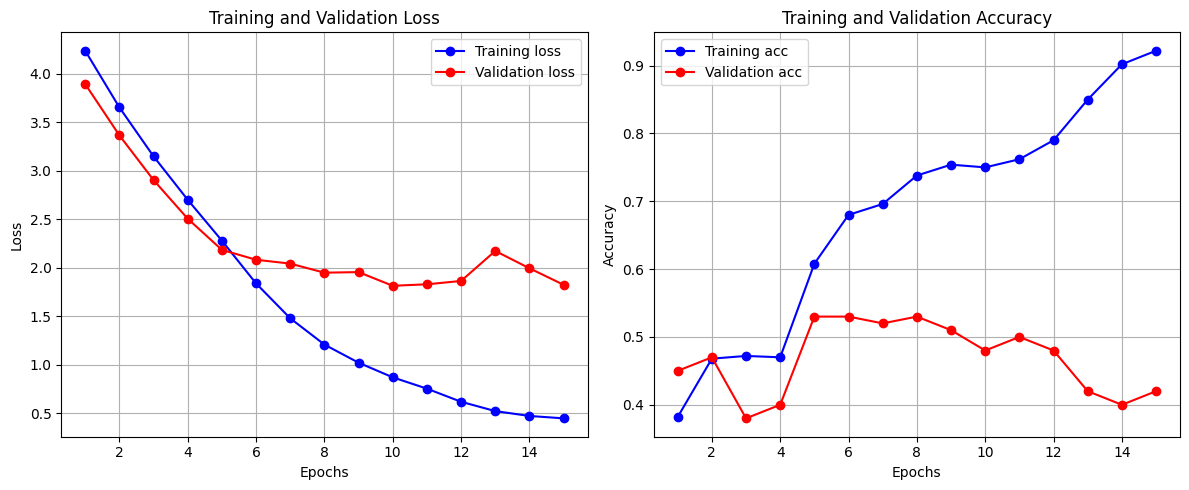

In [7]:
# Mendapatkan data history dari training
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

# Mendapatkan jumlah epoch
epochs = range(1, len(loss_values) + 1)

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo-', label='Training loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'bo-', label='Training acc')
plt.plot(epochs, val_accuracy_values, 'ro-', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

In [8]:
# Simpan bobot model
model.save("lstm_keras.h5")
print("Model Keras telah disimpan ke lstm_keras.h5")

Model Keras telah disimpan ke lstm_keras.h5


In [9]:
# Evaluasi model pada data test
print("\nMengevaluasi model pada data test...")

loss, accuracy = model.evaluate(test_token, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Menghitung F1 Score
y_pred_probs = model.predict(test_token)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)

f1 = keras.metrics.F1Score(average='macro')
f1.update_state(test_labels_one_hot, y_pred_probs)
print(f"Test F1 Score: {f1.result().numpy():.4f}")



# Prediksi contoh
print("\nMelakukan prediksi pada beberapa data test...")
predictions = model.predict(test_token[:5])
predicted_labels = np.argmax(predictions, axis=1)

label_reverse_map = {v: k for k, v in label_map.items()}

for i in range(5):
    print(f"Ke-{i+1}")
    # Use original integer test_labels_int for comparison here
    print(f"Label Asli: {label_reverse_map[test_labels[i]]}")
    print(f"Label Prediksi: {label_reverse_map[predicted_labels[i]]}\n")


Mengevaluasi model pada data test...
Test Loss: 1.9543
Test Accuracy: 0.4800
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Test F1 Score: 0.3630

Melakukan prediksi pada beberapa data test...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Ke-1
Label Asli: positive
Label Prediksi: negative

Ke-2
Label Asli: neutral
Label Prediksi: negative

Ke-3
Label Asli: negative
Label Prediksi: negative

Ke-4
Label Asli: positive
Label Prediksi: positive

Ke-5
Label Asli: neutral
Label Prediksi: negative

